In [1]:
import pandas as pd
df = pd.read_csv('../data/dataset_train.csv')
df

Index Hogwarts House First Name    Last Name    Birthday Best Hand  \
0         0      Ravenclaw     Tamara          Hsu  2000-03-30      Left   
1         1      Slytherin      Erich      Paredes  1999-10-14     Right   
2         2      Ravenclaw   Stephany        Braun  1999-11-03      Left   
3         3     Gryffindor      Vesta    Mcmichael  2000-08-19      Left   
4         4     Gryffindor     Gaston        Gibbs  1998-09-27      Left   
...     ...            ...        ...          ...         ...       ...   
1595   1595     Gryffindor       Jung        Blank  2001-09-14     Right   
1596   1596      Slytherin     Shelli         Lock  1998-03-12      Left   
1597   1597     Gryffindor   Benjamin  Christensen  1999-10-24     Right   
1598   1598     Hufflepuff  Charlotte       Dillon  2001-09-21      Left   
1599   1599     Hufflepuff      Kylie        Nowak  2000-08-21      Left   

      Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0        58384.0 -487.886086   5.727180                       4.878861   
1        67239.0 -552.060507  -5.987446                       5.520605   
2        23702.0 -366.076117   7.725017                       3.660761   
3        32667.0  697.742809  -6.497214                      -6.977428   
4        60158.0  436.775204  -7.820623                            NaN   
...          ...         ...        ...                            ...   
1595     49009.0  354.280086  -4.541837                      -3.542801   
1596     63296.0  367.531174   6.061064                      -3.675312   
1597     63905.0  544.018925  -3.203269                      -5.440189   
1598     82713.0  453.676219   3.442831                      -4.536762   
1599     48639.0  688.911989   5.421046                      -6.889120   

      Divination  Muggle Studies  Ancient Runes  History of Magic  \
0          4.722      272.035831     532.484226          5.231058   
1         -5.612     -487.340557     367.760303          4.107170   
2          6.140      664.893521     602.585284          3.555579   
3          4.026     -537.001128     523.982133         -4.809637   
4          2.236     -444.262537     599.324514         -3.444377   
...          ...             ...            ...               ...   
1595       5.702     -497.235066     618.220213         -5.231721   
1596       1.757     -643.271092     445.827565          2.238112   
1597       6.065     -385.150457     635.211486         -5.984257   
1598       6.738     -831.741123     383.444937          3.813111   
1599       6.593     -234.207911     339.775154          7.208415   

      Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0         1039.788281  3.790369                   0.715939 -232.79405  -26.89  
1         1058.944592  7.248742                   0.091674 -252.18425 -113.45  
2         1088.088348  8.728531                  -0.515327 -227.34265   30.42  
3          920.391449  0.821911                  -0.014040 -256.84675  200.64  
4          937.434724  4.311066                  -0.264070 -256.38730  157.98  
...               ...       ...                        ...        ...     ...  
1595       964.219853  3.389086                  -0.649983 -250.39401  185.83  
1596      1056.147366  5.825263                  -0.333962 -246.42719   44.80  
1597       953.866685  1.709808                   0.071569 -251.63679  198.47  
1598      1087.949205  3.904100                  -0.531875 -246.19072  -76.81  
1599      1034.928004  2.052215                   0.150532 -244.02063  -54.77  

[1600 rows x 19 columns]

In [2]:
courses = []
for series_name, series in df.items():
    if series.dtype == 'float64':
        courses.append(series_name)
courses

['Arithmancy',
 'Astronomy',
 'Herbology',
 'Defense Against the Dark Arts',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Care of Magical Creatures',
 'Charms',
 'Flying']

# Pair plot
Make a script called pair_plot.[extension] which displays a pair plot or scatter plot
matrix (according to the library that you are using).
Question : From this visualization, what features are you going to use for your logistic regression?

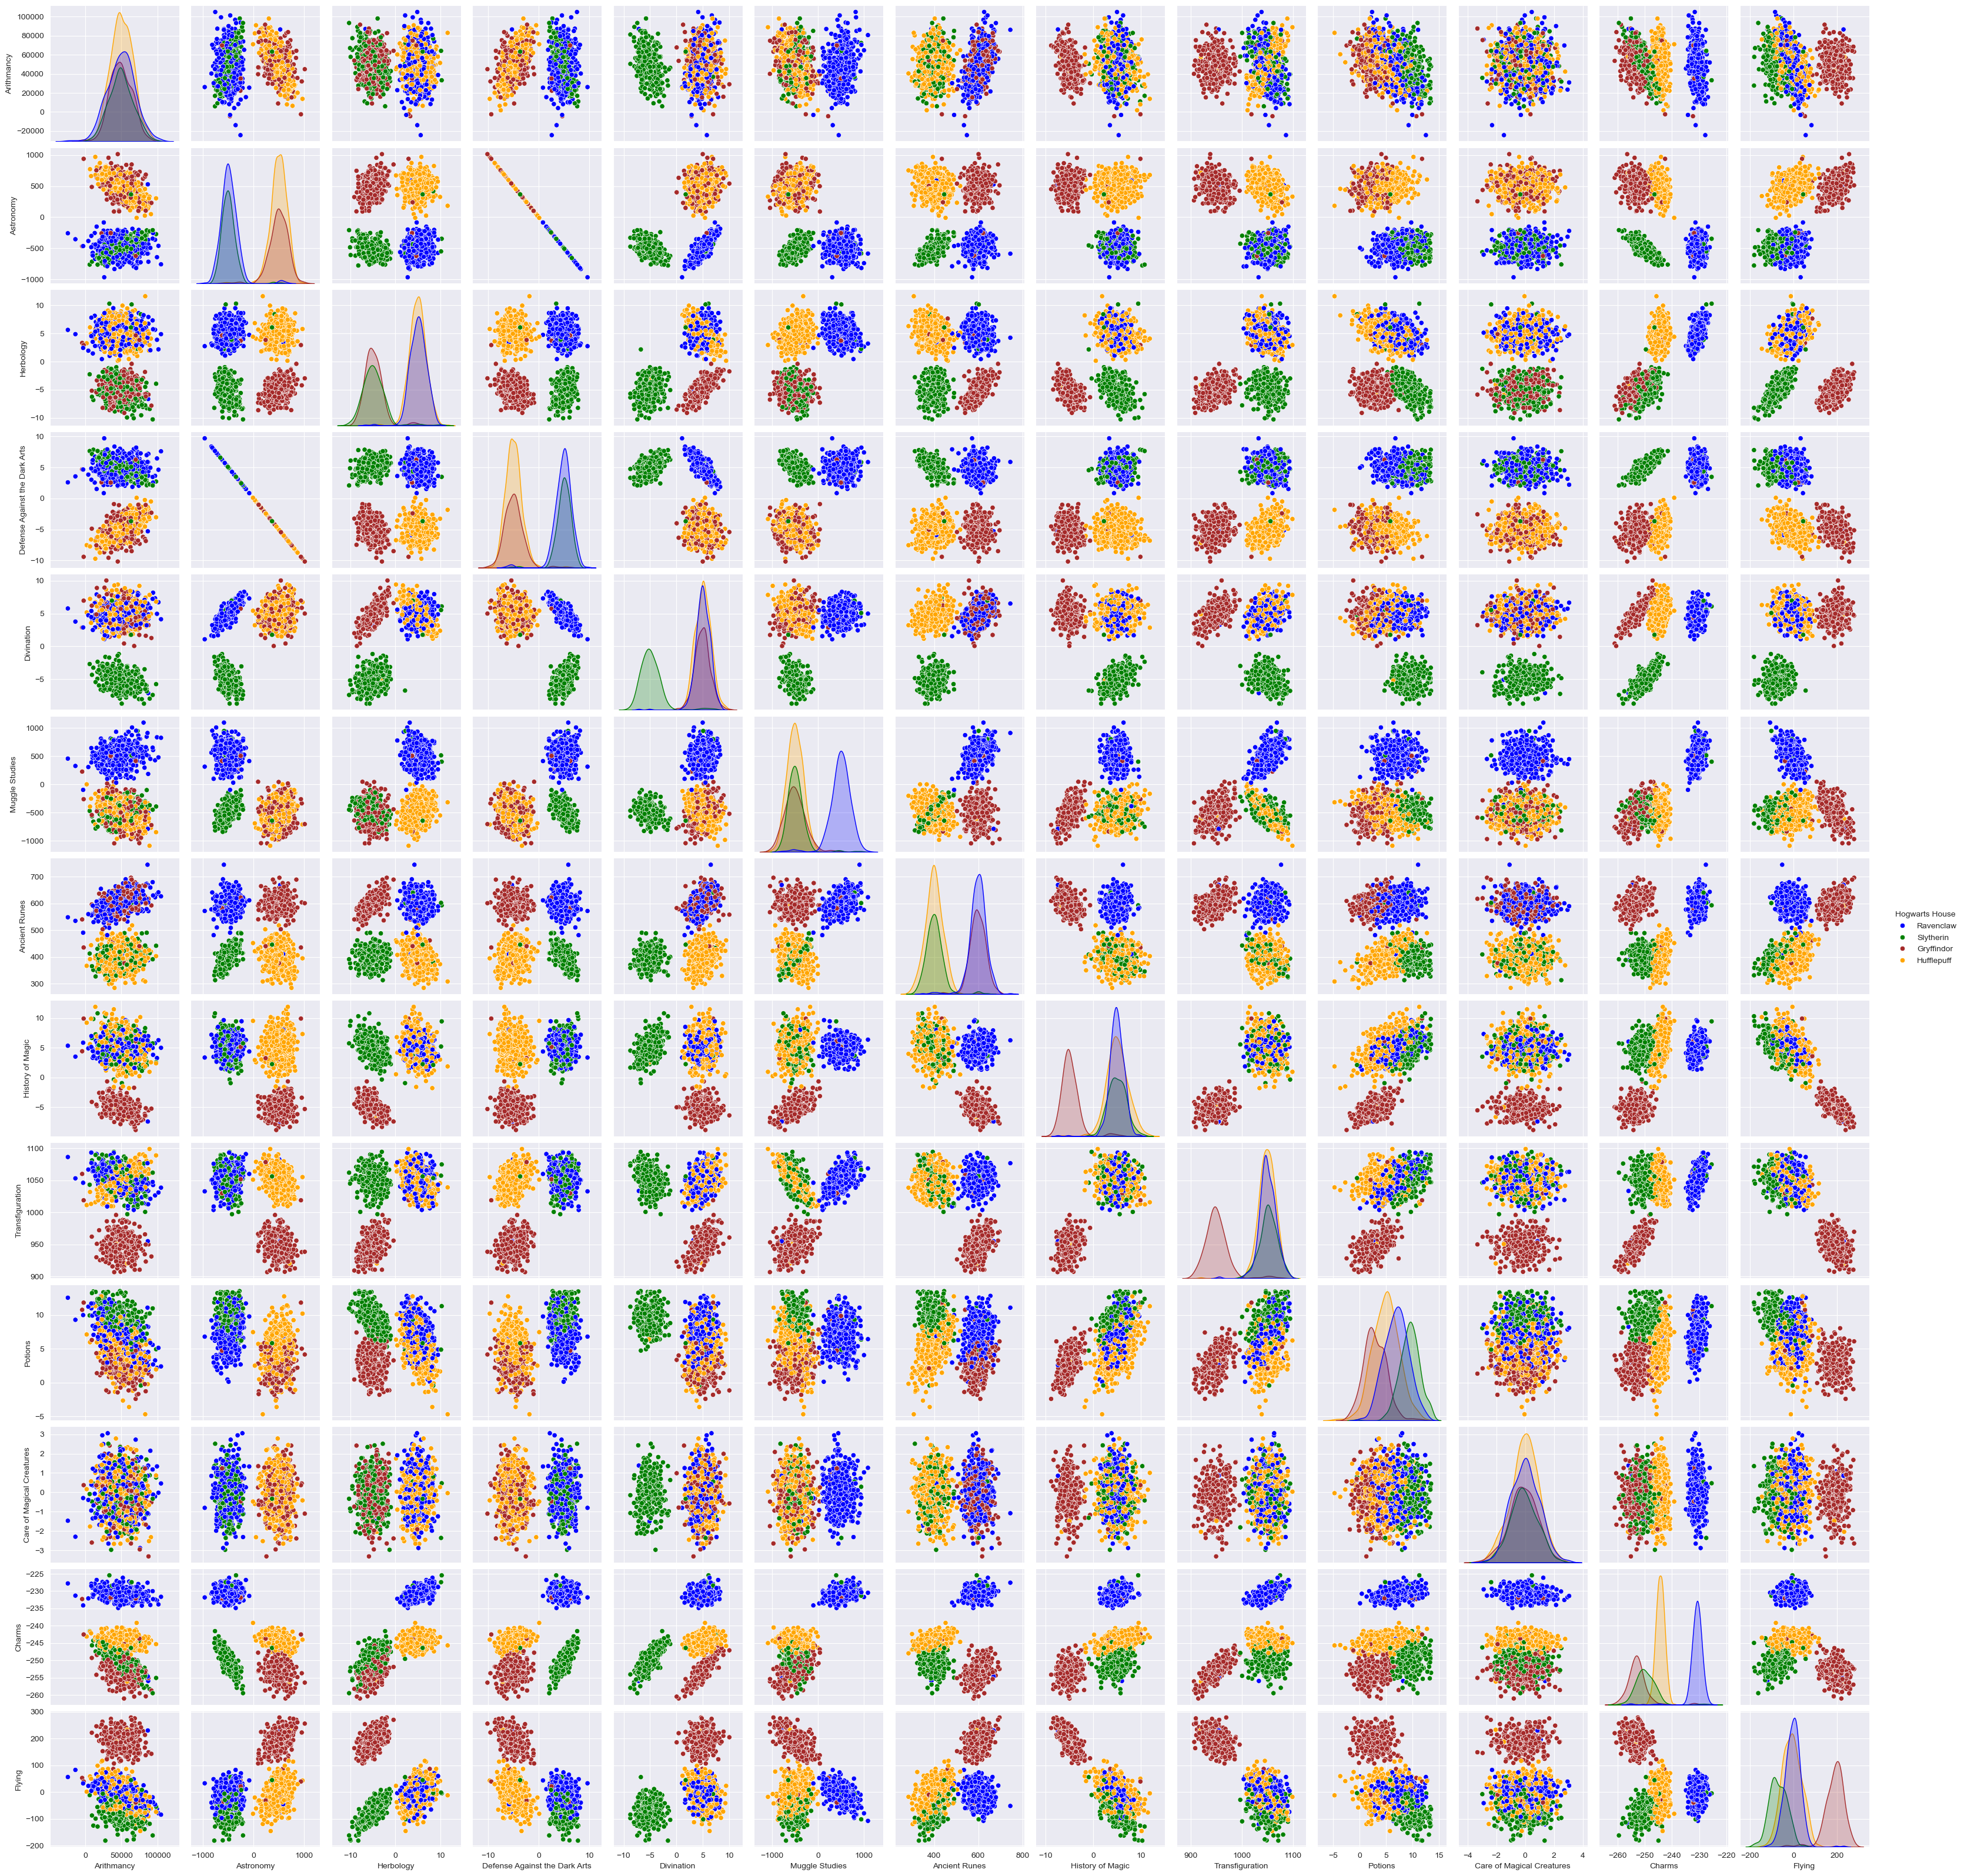

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

palette_couleur = {
    'Ravenclaw': 'blue',
    'Slytherin': 'green',
    'Gryffindor': 'brown',
    'Hufflepuff': 'orange'
}

data = df.select_dtypes(include=[np.float64])
data['Hogwarts House'] = df['Hogwarts House']
sns.pairplot(data, hue='Hogwarts House', palette=palette_couleur)
plt.savefig('img/pairplot.png')
plt.show()

# Conclusion
En voyant ce scatter_matrix et l'histoty et scatter plot fait plus tôt, on peut conclure que :
- Nous allons utiliser <span style="color:red">'Astronomy'</span> ou <span style="color:red">'Defense Against the Dark Arts'</span> car elles possèdent une corrélation négative très forte. Si nous utilisons les deux, nous risquons de tomber dans le cas de la multicolinéarité, avec des informations redondantes.
- <span style="color:red">'Arithmancy'</span> car toutes les écoles ont quasiment des valeurs similaires
- <span style="color:red">'Care of Magical Creatures'</span> car toutes les écoles ont quasiment des valeurs similaires

On se retrouve donc avec cette array de features :
- <span style="color:green">'Herbology'</span>
- <span style="color:green">'Divination'</span>
- <span style="color:green">'Muggle Studies'</span>
- <span style="color:green">'Ancient Runes'</span>
- <span style="color:green">'History of Magic'</span>
- <span style="color:green">'Transfiguration'</span>
- <span style="color:green">'Potions'</span>
- <span style="color:green">'Charms'</span>
- <span style="color:green">'Flying'</span>  


In [3]:
valid_courses = [ 
    # 'Arithmancy',
    'Astronomy',
    'Herbology',
    # 'Defense Against the Dark Arts',
    'Divination',
    'Muggle Studies',
    'Ancient Runes',
    'History of Magic',
    'Transfiguration',
    'Potions',
    # 'Care of Magical Creatures',
    'Charms',
    'Flying'
]
valid_courses

['Herbology',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Charms',
 'Flying']